In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import re
from wordcloud import WordCloud
import os
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [2]:
def plot_conf_matrix(y_pred, y_true, title=None):
    conf_mat = confusion_matrix(y_pred, y_true)
    df_cm = pd.DataFrame(conf_mat, index = [i for i in ["Fake", "Real"]],
                  columns = [i for i in ["Fake", "Real"]])
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True, cmap="Blues")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    if title:
        plt.title(f"{title} Confusion Matrix")
    plt.show()

# Read in Data and Preprocess

In [3]:
true_news_df = pd.read_csv("COVID19-FNIR/COVID19-FNIR/trueNews.csv")
fake_news_df = pd.read_csv("COVID19-FNIR/COVID19-FNIR/fakeNews.csv")

In [4]:
# Assign class columns and combine dataframes
fake_news_df["class"] = 0
true_news_df["class"] = 1
combined = pd.concat([fake_news_df, true_news_df], axis=0)

In [5]:
# Subset data to just contain the text field and the class field
combined = combined[["Text", "class"]].reset_index(drop=True)
# Shuffle data
combined = combined.sample(frac = 1)

In [6]:
combined.head()

,Text,class
4435,UK gallery curator calls for public art projec...,1
7154,Coronavirus UK map: the latest deaths and conf...,1
3178,"Barack Obama ""is the first ex-president to ev...",0
5741,#CoronavirusCrisis | It's now clinically prove...,1
5044,A petition has been filed in the Supreme Court...,1


In [7]:
def wordopt(text):
    """Formating of the text field """
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text



In [8]:
combined["Text"] = combined["Text"].apply(wordopt)

In [9]:
combined.head()

,Text,class
4435,uk gallery curator calls for public art projec...,1
7154,coronavirus uk map the latest deaths and conf...,1
3178,barack obama is the first ex president to ev...,0
5741,coronaviruscrisis it s now clinically prove...,1
5044,a petition has been filed in the supreme court...,1


In [10]:
# Set X and y variables
X = combined["Text"]
y = combined["class"]

In [11]:
# Split data into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html 

vectorization = TfidfVectorizer()
X_train = vectorization.fit_transform(X_train)
X_test = vectorization.transform(X_test)

# Model 1: Simple Sklearn Logistic Regression Model

In [13]:
lr_model = LogisticRegression()
# Fit model 
lr_model.fit(X_train, y_train)
# Predict 
y_pred = lr_model.predict(X_test)

In [14]:
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

Test Accuracy: 0.992619926199262


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       1.00      0.99      0.99       931

    accuracy                           0.99      1897
   macro avg       0.99      0.99      0.99      1897
weighted avg       0.99      0.99      0.99      1897



In [16]:
# Add confusion matrix and roc plot, maybe calulate some other metrics as well

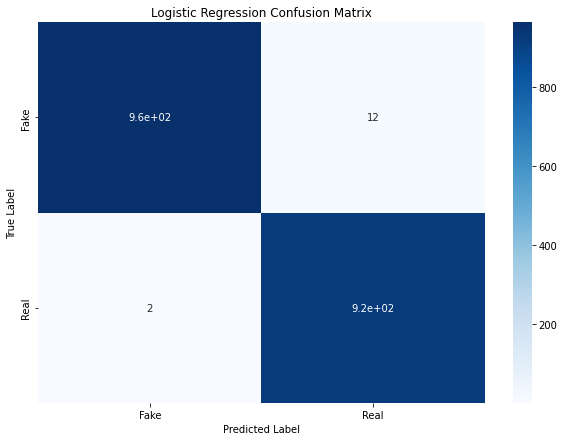

In [17]:
plot_conf_matrix(y_pred, y_test, title="Logistic Regression")

# Model 2 Decision Tree Classifier

In [18]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
# Fit model 
dt_model.fit(X_train, y_train)
# Predict 
y_pred = dt_model.predict(X_test)

In [19]:
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

Test Accuracy: 0.9952556668423828


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.99      1.00       931

    accuracy                           1.00      1897
   macro avg       1.00      1.00      1.00      1897
weighted avg       1.00      1.00      1.00      1897



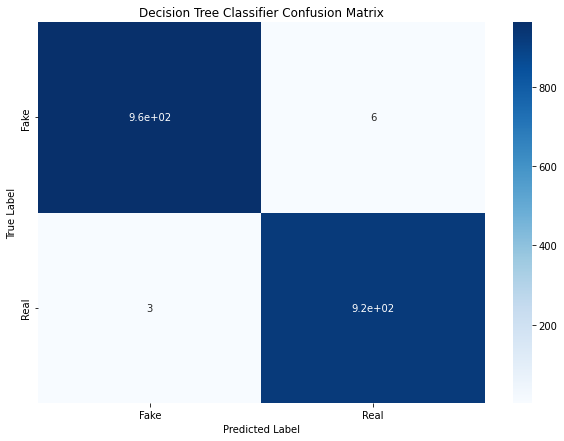

In [21]:
plot_conf_matrix(y_pred, y_test, title="Decision Tree Classifier")

# Model 3: Gradient Boosting classifier

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

gbt_model = GradientBoostingClassifier()
# Fit model 
gbt_model.fit(X_train, y_train)
# Predict 
y_pred = gbt_model.predict(X_test)

In [23]:
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

Test Accuracy: 0.9952556668423828


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.99      1.00       931

    accuracy                           1.00      1897
   macro avg       1.00      1.00      1.00      1897
weighted avg       1.00      1.00      1.00      1897



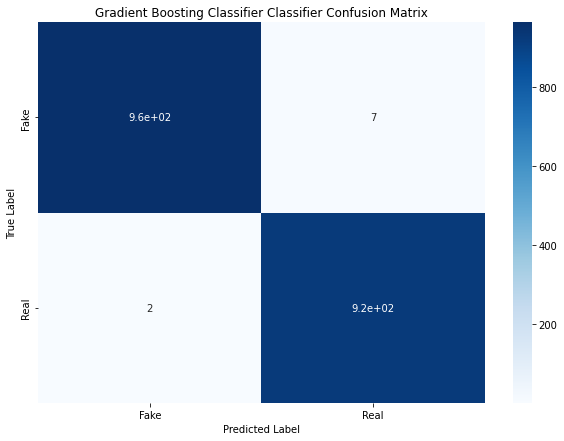

In [25]:
plot_conf_matrix(y_pred, y_test, title="Gradient Boosting Classifier Classifier")

# Model 4: Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
# Fit model 
rf_model.fit(X_train, y_train)
# Predict 
y_pred = rf_model.predict(X_test)

In [27]:
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

Test Accuracy: 0.9952556668423828


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.99      1.00       931

    accuracy                           1.00      1897
   macro avg       1.00      1.00      1.00      1897
weighted avg       1.00      1.00      1.00      1897



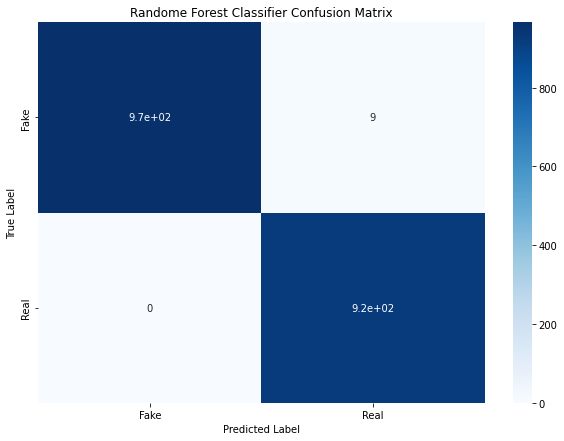

In [29]:
plot_conf_matrix(y_pred, y_test, title="Random Forest Classifier")

# LSTM Model

In [30]:
# https://medium.com/ai-techsystems/fake-news-classifier-using-bidirectional-lstm-cebef77b0adc

In [41]:

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
import nltk
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

In [42]:
# Set X and y variables
X = combined[["Text"]]
y = combined[["class"]]

In [43]:
# Vocabulary size
voc_size=30

In [44]:
X_copy=X.copy()
X_copy.reset_index(inplace=True)

In [45]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/kavi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(X_copy)):
    review = re.sub('[^a-zA-Z]', ' ', X_copy['Text'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
# corpus

In [51]:
onehot_repr = [one_hot(words,voc_size)for words in corpus] 

In [52]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
embedded_docs[0]

array([13,  7, 25,  9, 26, 25, 22, 10,  3,  6, 25,  5, 12, 22, 22, 14, 19,
        9, 16,  1], dtype=int32)

In [53]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
embedded_docs[0]

array([13,  7, 25,  9, 26, 25, 22, 10,  3,  6, 25,  5, 12, 22, 22, 14, 19,
        9, 16,  1], dtype=int32)

In [54]:
X_final=np.array(embedded_docs)
y_final=np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42, stratify=y)

In [105]:
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(Dropout(0.2))
model1.add(LSTM(1000))
model1.add(Dropout(0.2))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 20, 40)            1200      
                                                                 
 dropout_10 (Dropout)        (None, 20, 40)            0         
                                                                 
 lstm_5 (LSTM)               (None, 1000)              4164000   
                                                                 
 dropout_11 (Dropout)        (None, 1000)              0         
                                                                 
 dense_5 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 4,166,201
Trainable params: 4,166,201
Non-trainable params: 0
_________________________________________________________________
None


In [106]:
history = model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=256)

Epoch 1/20
20/20 [==============================] - 1s 26ms/step - loss: 0.4244 - accuracy: 0.8426 - val_loss: 0.3280 - val_accuracy: 0.8591
Epoch 2/20
20/20 [==============================] - 0s 15ms/step - loss: 0.3585 - accuracy: 0.8668 - val_loss: 0.3115 - val_accuracy: 0.8655
Epoch 3/20
20/20 [==============================] - 0s 15ms/step - loss: 0.2967 - accuracy: 0.8843 - val_loss: 0.2503 - val_accuracy: 0.8950
Epoch 4/20
20/20 [==============================] - 0s 15ms/step - loss: 0.2413 - accuracy: 0.9079 - val_loss: 0.2092 - val_accuracy: 0.9174
Epoch 5/20
20/20 [==============================] - 0s 15ms/step - loss: 0.1983 - accuracy: 0.9209 - val_loss: 0.2332 - val_accuracy: 0.9066
Epoch 6/20
20/20 [==============================] - 0s 15ms/step - loss: 0.1807 - accuracy: 0.9335 - val_loss: 0.1535 - val_accuracy: 0.9345
Epoch 7/20
20/20 [==============================] - 0s 15ms/step - loss: 0.1509 - accuracy: 0.9408 - val_loss: 0.1488 - val_accuracy: 0.9469
Epoch 8/20
20

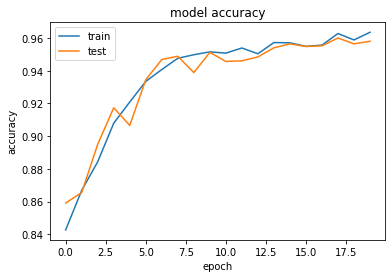

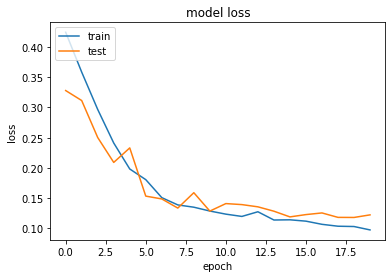

In [107]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [103]:
y_probs = model1.predict(X_test)
y_pred = np.around(y_probs)

In [104]:
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

Test Accuracy: 0.9528942115768463


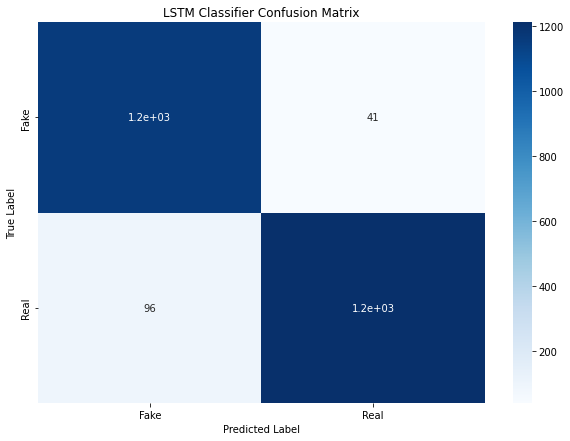

In [92]:
plot_conf_matrix(y_pred, y_test, title="LSTM Classifier")